# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Remove predictors with p-values too high and refit the model
* Examine and interpret the model results
* Split data into training and testing sets
* Fit a regression model to the data set using statsmodel library


## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)" then you need to further preprocess your column names.**

In [1]:
#Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [3]:
#Your code here - Manipulate column names
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col
df.columns = [col_formatting(col) for col in df.columns]
list(df.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_1half_3',
 'ages_1half_5',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_4_99',
 'ages_5plus',
 'ages_5_12',
 'ages_5_8',
 'ages_6plus',
 'ages_6_12',
 'ages_6_14',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DIMENSIONS',
 'theme_name_DUPLO',
 'theme_name_Dilophosaurus_Out

In [4]:
#Your code here - Define the target and predictors
outcome = 'list_price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [5]:
#Your code here - Fit the actual model
train, test = train_test_split(df)
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     530.6
Date:                Tue, 10 Sep 2019   Prob (F-statistic):               0.00
Time:                        16:06:18   Log-Likelihood:                -40492.
No. Observations:                8152   AIC:                         8.117e+04
Df Residuals:                    8057   BIC:                         8.184e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.7747      1.897     33.614      0.000      60.056      67.494
piece_count                                         74.5862      0.913     81.691      0.000      72.796      76.376
num_reviews                                          5.9059      0.673      8.776      0.000       4.587       7.225
play_star_rating                                     5.4971      0.628      8.756      0.000       4.266       6.728
star_rating                                         -1.3720      0.716     -1.916      0.055      -2.776       0.032
val_star_rating                                     -8.6384      0.642    -13.448      0.000      -9.898      -7.379
ages_10plus                                        122.4984      6.848     17.888      0.000     109.075     135.922
ages_10_14                                         -20.3602      8.925     -2.281      0.023     -37.856      -2.864
ages_10_16                                         -12.9052      4.012     -3.217      0.001     -20.770      -5.040
ages_10_21                                          51.0182      7.720      6.609      0.000      35.885      66.151
ages_11_16                                         -16.1189      5.850     -2.755      0.006     -27.586      -4.652
ages_12plus                                         67.0949      5.481     12.242      0.000      56.351      77.839
ages_12_16                                         -55.4450      7.068     -7.845      0.000     -69.300     -41.590
ages_14plus                                         32.9259      4.339      7.588      0.000      24.420      41.432
ages_16plus                                         27.1723      6.067      4.479      0.000      15.279      39.065
ages_1half_3                                        -9.3925      2.484     -3.782      0.000     -14.261      -4.524
ages_1half_5                                        -4.8599      3.054     -1.591      0.112     -10.847       1.127
ages_2_5                                            14.3446      1.718      8.347      0.000      10.976      17.713
ages_4plus                                         -17.5259      6.459     -2.713      0.007     -30.187      -4.864
ages_4_7                                            -7.3656      3.516     -2.095      0.036     -14.257      -0.474
ages_4_99                                           -4.6443      3.678     -1.263      0.207     -11.854       2.565
ages_5plus                                         -10.7895      3.112     -3.467      0.001     -16.890      -4.689
ages_5_12                                          -35.8957      3.243    -11.067      0.000     -42.253     -29.538
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [6]:
#Your code here - Remove features which do not appear to be statistically relevant
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|']<0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

103 69
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10plus']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,63.7747,1.897,33.614,0.000,60.056,67.494
piece_count,74.5862,0.913,81.691,0.000,72.796,76.376
num_reviews,5.9059,0.673,8.776,0.000,4.587,7.225
play_star_rating,5.4971,0.628,8.756,0.000,4.266,6.728
star_rating,-1.3720,0.716,-1.916,0.055,-2.776,0.032


In [7]:
#Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     732.5
Date:                Tue, 10 Sep 2019   Prob (F-statistic):               0.00
Time:                        16:06:19   Log-Likelihood:                -40507.
No. Observations:                8152   AIC:                         8.115e+04
Df Residuals:                    8083   BIC:                         8.164e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.0747      2.653     24.149      0.000      58.873      69.276
piece_count                                         74.8760      0.891     84.004      0.000      73.129      76.623
num_reviews                                          5.8246      0.649      8.973      0.000       4.552       7.097
play_star_rating                                     4.9211      0.527      9.333      0.000       3.887       5.955
val_star_rating                                     -9.1909      0.499    -18.430      0.000     -10.168      -8.213
ages_10plus                                        118.5030      5.068     23.383      0.000     108.568     128.438
ages_10_14                                         -15.4317      9.371     -1.647      0.100     -33.801       2.938
ages_10_16                                          -9.2529      4.141     -2.234      0.025     -17.371      -1.135
ages_10_21                                          44.3775      3.811     11.644      0.000      36.907      51.848
ages_11_16                                         -13.2068      5.876     -2.247      0.025     -24.726      -1.687
ages_12plus                                         68.7426      6.091     11.285      0.000      56.802      80.683
ages_12_16                                         -50.4643      7.499     -6.729      0.000     -65.164     -35.764
ages_14plus                                         38.3541      4.806      7.980      0.000      28.933      47.775
ages_16plus                                         30.1478      6.814      4.424      0.000      16.791      43.505
ages_1half_3                                        -4.1338      3.692     -1.120      0.263     -11.372       3.104
ages_2_5                                            18.9609      2.666      7.111      0.000      13.734      24.188
ages_4plus                                         -13.4698      9.880     -1.363      0.173     -32.836       5.897
ages_4_7                                            -3.2055      2.769     -1.158      0.247      -8.634       2.223
ages_5plus                                          -8.5444      3.214     -2.659      0.008     -14.845      -2.244
ages_5_12                                          -29.8749      3.124     -9.564      0.000     -35.998     -23.752
ages_6plus                                         -23.2946      5.637     -4.133      0.000     -34.344     -12.245
ages_6_12                                          -16.1710      2.509     -6.445      0.000     -21.090     -11.252
ages_7_12                                          -16.4605      2.802     -5.874      0.000     -21.954     -10.967
ages_7_14                                

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [8]:
#Your code here - Continue to refine the model
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|']<0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

70 58
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10plus']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     873.3
Date:                Tue, 10 Sep 2019   Prob (F-statistic):               0.00
Time:                        16:06:19   Log-Likelihood:                -40514.
No. Observations:                8152   AIC:                         8.114e+04
Df Residuals:                    8094   BIC:                         8.155e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.5025      1.252     50.736      0.000      61.049      65.956
piece_count                                         74.9682      0.856     87.555      0.000      73.290      76.647
num_reviews                                          5.5989      0.615      9.097      0.000       4.392       6.805
play_star_rating                                     5.0540      0.523      9.663      0.000       4.029       6.079
val_star_rating                                     -9.3138      0.494    -18.845      0.000     -10.283      -8.345
ages_10plus                                        121.5178      4.659     26.080      0.000     112.384     130.652
ages_10_16                                          -5.8829      3.514     -1.674      0.094     -12.772       1.006
ages_10_21                                          46.7928      3.295     14.201      0.000      40.334      53.252
ages_11_16                                          -9.9618      5.416     -1.839      0.066     -20.579       0.655
ages_12plus                                         71.3229      5.699     12.515      0.000      60.152      82.494
ages_12_16                                         -47.2435      7.097     -6.657      0.000     -61.155     -33.331
ages_14plus                                         41.8771      4.166     10.052      0.000      33.711      50.043
ages_16plus                                         33.7124      6.191      5.445      0.000      21.576      45.849
ages_2_5                                            21.6058      1.846     11.707      0.000      17.988      25.224
ages_5plus                                          -7.7560      3.011     -2.576      0.010     -13.659      -1.854
ages_5_12                                          -27.1501      2.514    -10.798      0.000     -32.079     -22.221
ages_6plus                                         -20.3170      5.297     -3.835      0.000     -30.701      -9.933
ages_6_12                                          -13.1495      1.576     -8.346      0.000     -16.238     -10.061
ages_7_12                                          -13.2287      1.972     -6.709      0.000     -17.094      -9.363
ages_7_14                                           -9.1012      1.682     -5.411      0.000     -12.398      -5.804
ages_8plus                                          16.3761      4.423      3.702      0.000       7.706      25.047
ages_8_12                                          -12.7441      2.509     -5.080      0.000     -17.662      -7.826
ages_8_14                                           -7.4278      1.675     -4.435      0.000     -10.711      -4.145
ages_9plus                               

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extend of this problem.

In [9]:
#Your code here - Code a way to identify multicollinearity
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 4.367583009736083),
 ('num_reviews', 2.4818352134861343),
 ('play_star_rating', 1.7754039691786438),
 ('val_star_rating', 1.5985163459500402),
 ('ages_10plus', 7.025447809004128),
 ('ages_10_16', 1.1151519936870071),
 ('ages_10_21', 1.052811248522435),
 ('ages_11_16', 1.1307556682666564),
 ('ages_12plus', 5.998519311768314),
 ('ages_12_16', 1.1446390315484114),
 ('ages_14plus', 1.7282971017328999),
 ('ages_16plus', 8.715161804415608),
 ('ages_2_5', 1.185556975093257),
 ('ages_5plus', inf),
 ('ages_5_12', 3.1132958898321994),
 ('ages_6plus', 2.65490544119831),
 ('ages_6_12', 1.6520715746305288),
 ('ages_7_12', 1.3966694738233432),
 ('ages_7_14', 1.6309011319766964),
 ('ages_8plus', 2.5740489594530915),
 ('ages_8_12', 1.2203716697991376),
 ('ages_8_14', 1.5118109715414783),
 ('ages_9plus', 1.397743657764987),
 ('ages_9_12', 1.016302096564993),
 ('theme_name_Architecture', 5.15418000689449),
 ('theme_name_BOOST', 1.0580495204419798),
 ('theme_name_Blues_Helicopter_Pursuit

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [10]:
#Your code here - Subset features based on multicollinearity
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

58 51


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     875.7
Date:                Tue, 10 Sep 2019   Prob (F-statistic):               0.00
Time:                        16:06:22   Log-Likelihood:                -40894.
No. Observations:                8152   AIC:                         8.189e+04
Df Residuals:                    8100   BIC:                         8.226e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.8729      1.092     59.396      0.000      62.732      67.014
piece_count                                         76.6622      0.697    110.049      0.000      75.297      78.028
num_reviews                                          4.0337      0.601      6.709      0.000       2.855       5.212
play_star_rating                                     6.1125      0.495     12.340      0.000       5.141       7.083
val_star_rating                                    -10.8990      0.492    -22.140      0.000     -11.864      -9.934
ages_10_16                                         -10.5273      3.535     -2.978      0.003     -17.457      -3.597
ages_10_21                                          45.1664      3.407     13.257      0.000      38.488      51.845
ages_11_16                                         -18.6047      5.426     -3.429      0.001     -29.241      -7.969
ages_12_16                                         -57.0387      7.098     -8.036      0.000     -70.952     -43.126
ages_14plus                                         23.8492      3.752      6.357      0.000      16.495      31.204
ages_2_5                                            20.6604      1.831     11.283      0.000      17.071      24.250
ages_5_12                                          -28.4248      2.563    -11.090      0.000     -33.449     -23.401
ages_6plus                                         -22.4593      5.513     -4.074      0.000     -33.266     -11.653
ages_6_12                                          -15.8110      1.539    -10.276      0.000     -18.827     -12.795
ages_7_12                                          -15.0218      1.988     -7.558      0.000     -18.918     -11.126
ages_7_14                                          -11.1787      1.665     -6.715      0.000     -14.442      -7.915
ages_8plus                                           3.1381      4.496      0.698      0.485      -5.675      11.951
ages_8_12                                          -14.9994      2.518     -5.956      0.000     -19.936     -10.063
ages_8_14                                          -10.5593      1.669     -6.327      0.000     -13.831      -7.288
ages_9plus                                          21.6318      9.998      2.164      0.031       2.033      41.230
ages_9_12                                          -27.0240      6.214     -4.349      0.000     -39.205     -14.843
theme_name_BOOST                                    91.9422     10.048      9.150      0.000      72.246     111.639
theme_name_Blues_Helicopter_Pursuit                 21.8256      9.341      2.337      0.019       3.515      40.136
theme_name_Carnotaurus_Gyrosphere_Escape 

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

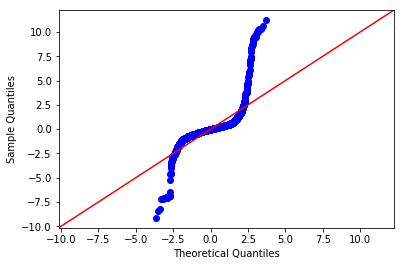

In [11]:
# Your code here - Check that the residuals are normally distributed
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

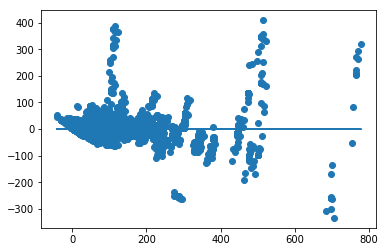

In [12]:
#Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confiding the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least 2 additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

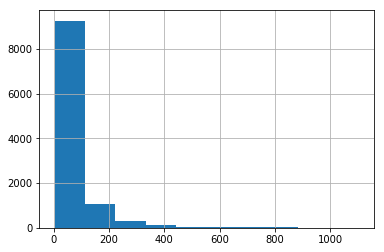

In [13]:
#Your code here - Check for outliers
df.list_price.hist()

In [14]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

0.8 percentile: 90.986
0.81 percentile: 92.66216100000052
0.82 percentile: 97.5878
0.83 percentile: 101.898
0.84 percentile: 109.13971199999885
0.85 percentile: 110.352
0.86 percentile: 119.96492
0.87 percentile: 121.9878
0.88 percentile: 121.9878
0.89 percentile: 134.18779999999998
0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878


In [15]:
#Your code here - Rerun the model with extreme outliers removed
orig_tot = len(df)
df = df[df.list_price < 450] #Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.list_price.map(np.log) #Applying a log transformation
train, test = train_test_split(df)

#Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

Percent removed: 0.010487580496780129


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     470.3
Date:                Tue, 10 Sep 2019   Prob (F-statistic):               0.00
Time:                        16:06:23   Log-Likelihood:                -5019.5
No. Observations:                8067   AIC:                         1.014e+04
Df Residuals:                    8015   BIC:                         1.051e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4030      0.014    249.989      0.000       3.376       3.430
piece_count                                          0.6331      0.010     63.107      0.000       0.613       0.653
num_reviews                                         -0.0313      0.008     -4.068      0.000      -0.046      -0.016
play_star_rating                                     0.1030      0.006     16.872      0.000       0.091       0.115
val_star_rating                                     -0.1615      0.006    -26.286      0.000      -0.174      -0.149
ages_10_16                                           0.5408      0.045     12.120      0.000       0.453       0.628
ages_10_21                                           0.6656      0.041     16.250      0.000       0.585       0.746
ages_11_16                                           0.1629      0.068      2.390      0.017       0.029       0.297
ages_12_16                                          -0.1656      0.094     -1.763      0.078      -0.350       0.019
ages_14plus                                          0.4016      0.048      8.388      0.000       0.308       0.495
ages_2_5                                             0.4821      0.022     21.545      0.000       0.438       0.526
ages_5_12                                           -0.6778      0.032    -20.949      0.000      -0.741      -0.614
ages_6plus                                          -0.8797      0.071    -12.407      0.000      -1.019      -0.741
ages_6_12                                           -0.1534      0.019     -7.997      0.000      -0.191      -0.116
ages_7_12                                            0.0667      0.024      2.752      0.006       0.019       0.114
ages_7_14                                            0.0094      0.021      0.461      0.645      -0.031       0.050
ages_8plus                                           0.6090      0.055     11.097      0.000       0.501       0.717
ages_8_12                                            0.2062      0.032      6.491      0.000       0.144       0.269
ages_8_14                                            0.2638      0.020     12.901      0.000       0.224       0.304
ages_9plus                                           0.1986      0.124      1.598      0.110      -0.045       0.442
ages_9_12                                            0.3165      0.081      3.892      0.000       0.157       0.476
theme_name_BOOST                                     1.0328      0.120      8.598      0.000       0.797       1.268
theme_name_Blues_Helicopter_Pursuit                  0.7116      0.123      5.787      0.000       0.471       0.953
theme_name_Carnotaurus_Gyrosphere_Escape 

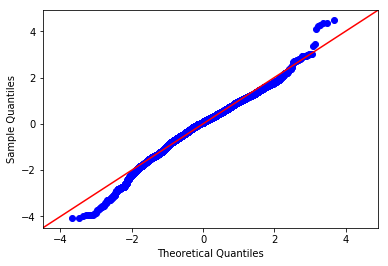

In [16]:
#Your code here - Check normality and homoscedasticity assumptions
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

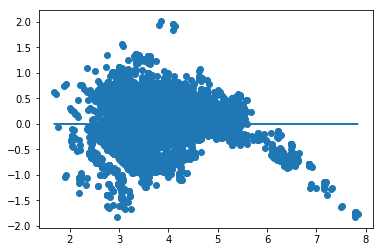

In [17]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches and make ongoing refinements. These choices depend on the context and specific use cases. 